In [2]:
import pandas as pd
import matplotlib.pyplot as plt

trndata = pd.read_csv("Desktop/KAGGLE/train_titanic.csv")

trndata.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#pclass: A proxy for socio-economic status (SES)
#1st = Upper
#2nd = Middle
#3rd = Lower




#survival	Survival	0 = No, 1 = Yes
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sex	Sex	
#Age	Age in years	
#sibsp	# of siblings / spouses aboard the Titanic	
#parch	# of parents / children aboard the Titanic	
#ticket	Ticket number	
#fare	Passenger fare	
#cabin	Cabin number	
#embarked	Port of Embarkation

In [3]:
tstdata = pd.read_csv("Desktop/KAGGLE/test_titanic.csv")
tstdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
trndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#FEATURE SELECTION

traindata = trndata[['PassengerId','Pclass','Age','SibSp','Parch','Survived','Sex']]


testdata = tstdata[['PassengerId','Pclass','Age','SibSp','Parch','Sex']]





In [6]:
traindata['Sex'].replace('male',0,inplace= True)
traindata['Sex'].replace('female',1,inplace= True)


testdata['Sex'].replace('male',0,inplace= True)
testdata['Sex'].replace('female',1,inplace= True)
    
    
traindata.head()    
        

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,PassengerId,Pclass,Age,SibSp,Parch,Survived,Sex
0,1,3,22.0,1,0,0,0
1,2,1,38.0,1,0,1,1
2,3,3,26.0,0,0,1,1
3,4,1,35.0,1,0,1,1
4,5,3,35.0,0,0,0,0


In [7]:
age_median = traindata['Age'].median()
age_test_median = testdata['Age'].median()

In [8]:
#REPLACING ALL NaN values in Age column BY THEIR MEDIAN VALUE

traindata.fillna(value = age_median ,inplace = True)

testdata.fillna(value = age_test_median ,inplace = True)

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [9]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Survived       891 non-null int64
Sex            891 non-null int64
dtypes: float64(1), int64(6)
memory usage: 48.8 KB


In [10]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Sex            418 non-null int64
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


In [11]:
traindata['sibsp_parch'] = traindata['SibSp'] + traindata['Parch']
traindata.head()

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Pclass,Age,SibSp,Parch,Survived,Sex,sibsp_parch
0,1,3,22.0,1,0,0,0,1
1,2,1,38.0,1,0,1,1,1
2,3,3,26.0,0,0,1,1,0
3,4,1,35.0,1,0,1,1,1
4,5,3,35.0,0,0,0,0,0


In [12]:
testdata['sibsp_parch'] = testdata['SibSp'] + testdata['Parch']
testdata.head()

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Pclass,Age,SibSp,Parch,Sex,sibsp_parch
0,892,3,34.5,0,0,0,0
1,893,3,47.0,1,0,1,1
2,894,2,62.0,0,0,0,0
3,895,3,27.0,0,0,0,0
4,896,3,22.0,1,1,1,2


In [13]:
traindata.drop(columns = ['SibSp','Parch','PassengerId'],inplace = True)
testdata.drop(columns = ['SibSp','Parch','PassengerId'],inplace = True)


C:\Users\harsh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
traindata.head()

,Pclass,Age,Survived,Sex,sibsp_parch
0,3,22.0,0,0,1
1,1,38.0,1,1,1
2,3,26.0,1,1,0
3,1,35.0,1,1,1
4,3,35.0,0,0,0


In [15]:
testdata.head()

,Pclass,Age,Sex,sibsp_parch
0,3,34.5,0,0
1,3,47.0,1,1
2,2,62.0,0,0
3,3,27.0,0,0
4,3,22.0,1,2


In [16]:
traindata_label = traindata['Survived']
traindata_label.value_counts()

0    549
1    342
Name: Survived, dtype: int64

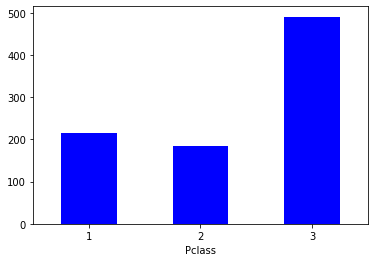

In [17]:
pclass = traindata.groupby(['Pclass'])['Survived'].count()
pclass.plot(kind = 'bar',color = 'blue')
plt.xticks(rotation = 'horizontal')
plt.show()


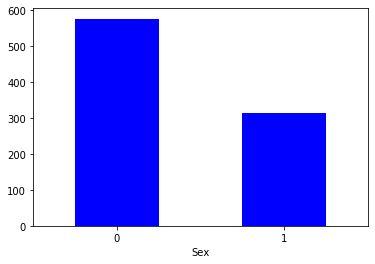

In [18]:
sex = traindata.groupby(['Sex'])['Survived'].count()
sex.plot(kind = 'bar',color = 'blue')
plt.xticks(rotation = 'horizontal')
plt.show()


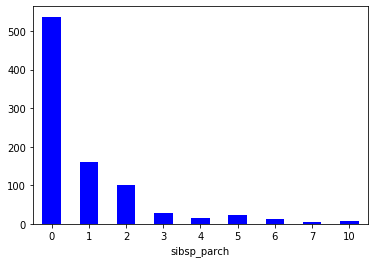

In [19]:
sibsp_prach = traindata.groupby(['sibsp_parch'])['Survived'].count()
sibsp_prach.plot(kind = 'bar',color = 'blue')
plt.xticks(rotation = 'horizontal')

plt.show()

In [20]:




traindata.drop(columns = ['Survived'],inplace = True)

In [21]:
#SCALING DOWN THE features BY CONVERTING THEM INTO STANDART NORMAL 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = list(traindata.columns)
train_norm = pd.DataFrame(data = traindata)
train_norm[cols] = scaler.fit_transform(traindata[cols])
train_norm.head(10)

,Pclass,Age,Sex,sibsp_parch
0,0.827377,-0.565736,-0.737695,0.059160
1,-1.566107,0.663861,1.355574,0.059160
2,0.827377,-0.258337,1.355574,-0.560975
3,-1.566107,0.433312,1.355574,0.059160
4,0.827377,0.433312,-0.737695,-0.560975
5,0.827377,-0.104637,-0.737695,-0.560975
6,-1.566107,1.893459,-0.737695,-0.560975
7,0.827377,-2.102733,-0.737695,1.919564
8,0.827377,-0.181487,1.355574,0.679295
9,-0.369365,-1.180535,1.355574,0.059160


In [22]:
#DECISIONTREECLASSIFIER

from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion="entropy")
dTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
dTree.fit(traindata,traindata_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
predTree = dTree.predict(testdata)

In [25]:
print(predTree[0:5])

[0 1 0 0 0]


In [26]:
dTree.score(traindata,traindata_label)

0.9113355780022446

In [30]:
 #RANDOMFORESTCLASSIFIER

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(traindata, traindata_label)
y_pred_rf = rf.predict(testdata)
acc_rf = round(rf.score(traindata, traindata_label)*100, 2)
print('Random Forest accuracy: ', acc_rf)

Random Forest accuracy:  91.13


NameError: name 'submission_to_csv' is not defined